# 复习

* 收益率，连续收益率，单期收益率与多期收益率的关系

* 风险,夏普率

## 掘金多股价数据处理-数据变形与空值处理

https://blog.csdn.net/qq_17753903/article/details/89892631

In [4]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

In [2]:
from gm.api import *
import pandas as pd
import numpy as np

set_token("eea4b28a3ceb7048603d388bb777ebc67de47385")

In [3]:
#000413 东旭光电，000063 中兴通讯，002007 华兰生物，000001 平安银行，000002 万科A
stock_n = history(symbol='SZSE.000413,SZSE.000063,SZSE.002007,SZSE.000001,SZSE.000002', frequency='1d', start_time='2015-01-01',  end_time='2015-12-31', fields='symbol,open, close, low, high, eob', adjust=ADJUST_PREV, df= True)
stock_n

,symbol,open,close,low,high,eob
0,SZSE.000063,14.7448,15.0698,14.5070,15.3473,2015-01-05 00:00:00+08:00
1,SZSE.000002,10.9058,11.2999,10.7770,11.5879,2015-01-05 00:00:00+08:00
2,SZSE.000001,10.1555,10.1745,9.9078,10.3396,2015-01-05 00:00:00+08:00
3,SZSE.002007,10.0151,9.9189,9.7445,10.0693,2015-01-05 00:00:00+08:00
4,SZSE.000063,14.9826,15.9418,14.8637,16.1558,2015-01-06 00:00:00+08:00
...,...,...,...,...,...,...
1176,SZSE.002007,13.5467,13.6924,13.5103,14.0841,2015-12-30 00:00:00+08:00
1177,SZSE.000413,8.8681,8.7051,8.7051,8.9448,2015-12-31 00:00:00+08:00
1178,SZSE.000063,18.3058,17.8835,17.8739,18.3058,2015-12-31 00:00:00+08:00
1179,SZSE.000001,9.3036,9.2190,9.2113,9.3267,2015-12-31 00:00:00+08:00


In [5]:
def time_str(x):
    return str(x.date())

stock_n.eob=stock_n.eob.apply(time_str)

In [6]:
stock_n

,symbol,open,close,low,high,eob
0,SZSE.000063,14.7448,15.0698,14.5070,15.3473,2015-01-05
1,SZSE.000002,10.9058,11.2999,10.7770,11.5879,2015-01-05
2,SZSE.000001,10.1555,10.1745,9.9078,10.3396,2015-01-05
3,SZSE.002007,10.0151,9.9189,9.7445,10.0693,2015-01-05
4,SZSE.000063,14.9826,15.9418,14.8637,16.1558,2015-01-06
...,...,...,...,...,...,...
1176,SZSE.002007,13.5467,13.6924,13.5103,14.0841,2015-12-30
1177,SZSE.000413,8.8681,8.7051,8.7051,8.9448,2015-12-31
1178,SZSE.000063,18.3058,17.8835,17.8739,18.3058,2015-12-31
1179,SZSE.000001,9.3036,9.2190,9.2113,9.3267,2015-12-31


In [7]:
stock_close=pd.pivot_table(stock_n,index=["eob"],columns=["symbol"],values=["close"]).close
stock_close

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2015-01-05,10.1745,11.2999,15.0698,NaN,9.9189
2015-01-06,10.0221,10.8831,15.9418,NaN,10.4331
2015-01-07,9.8316,10.7845,15.6247,NaN,10.2436
2015-01-08,9.5013,10.2995,15.8467,NaN,10.4541
2015-01-09,9.5775,10.1934,15.4979,NaN,10.3369
...,...,...,...,...,...
2015-12-25,9.5420,NaN,18.2482,8.9640,13.2643
2015-12-28,9.2113,NaN,17.6243,8.6668,13.0184
2015-12-29,9.2959,NaN,17.8643,8.7914,13.5467


In [81]:
#help(stock_close.fillna)

In [8]:
data=stock_close.fillna(axis=0,method='ffill')
data.fillna(axis=0,method='bfill',inplace=True)

In [9]:
data

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2015-01-05,10.1745,11.2999,15.0698,8.0181,9.9189
2015-01-06,10.0221,10.8831,15.9418,8.0181,10.4331
2015-01-07,9.8316,10.7845,15.6247,8.0181,10.2436
2015-01-08,9.5013,10.2995,15.8467,8.0181,10.4541
2015-01-09,9.5775,10.1934,15.4979,8.0181,10.3369
...,...,...,...,...,...
2015-12-25,9.5420,19.1382,18.2482,8.9640,13.2643
2015-12-28,9.2113,19.1382,17.6243,8.6668,13.0184
2015-12-29,9.2959,19.1382,17.8643,8.7914,13.5467


### 多股票收益率计算

In [85]:
data

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2015-01-05,10.1745,11.2999,15.0698,8.0181,9.9189
2015-01-06,10.0221,10.8831,15.9418,8.0181,10.4331
2015-01-07,9.8316,10.7845,15.6247,8.0181,10.2436
2015-01-08,9.5013,10.2995,15.8467,8.0181,10.4541
2015-01-09,9.5775,10.1934,15.4979,8.0181,10.3369
...,...,...,...,...,...
2015-12-25,9.5420,19.1382,18.2482,8.9640,13.2643
2015-12-28,9.2113,19.1382,17.6243,8.6668,13.0184
2015-12-29,9.2959,19.1382,17.8643,8.7914,13.5467


In [10]:
r=(data/data.shift(1)-1).dropna()

r.head()

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2015-01-06,-0.0150,-0.0369,0.0579,0.0,0.0518
2015-01-07,-0.0190,-0.0091,-0.0199,0.0,-0.0182
2015-01-08,-0.0336,-0.0450,0.0142,0.0,0.0205
2015-01-09,0.0080,-0.0103,-0.0220,0.0,-0.0112
2015-01-12,-0.0206,-0.0245,-0.0210,0.0,0.0209


In [ ]:
r

In [84]:
#r_p["000413.XSHE"]

# 资产风险的测度


https://blog.csdn.net/weixin_42219751/article/details/94391315

### 方差

## 夏普率

夏普率(sharpe ratio): 衡量策略相对于无风险组合的表现，是策略所获得风险溢价的度量——即如果策略额外承担一单位的风险，可以获得多少单位的收益作为补偿。

https://www.ricequant.com/doc/api/python/chn#backtest-results-factors

https://wiki.mbalib.com/wiki/%E5%A4%8F%E6%99%AE%E6%8C%87%E6%95%B0


### 连续收益率

* 和一般收益率一一对应
* 多期等于单期之和

## classwork1

* 请计算SZSE.002007的年度夏普率
* 请计算各个股票各天的日收益率，日连续收益率（np.log），年化连续收益率（sum）

In [29]:
np.log(data["SZSE.002007"][-1])-np.log(data["SZSE.002007"][0])

0.2977048164153988

In [28]:
r_log.sum()

symbol
SZSE.000001   -0.0986
SZSE.000002    0.5269
SZSE.000063    0.1712
SZSE.000413    0.0822
SZSE.002007    0.2977
dtype: float64

In [69]:
r_log.dropna()

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2015-01-06,-0.0151,-0.0376,0.0563,0.0000,0.0505
2015-01-07,-0.0192,-0.0091,-0.0201,0.0000,-0.0183
2015-01-08,-0.0342,-0.0460,0.0141,0.0000,0.0203
2015-01-09,0.0080,-0.0104,-0.0223,0.0000,-0.0113
2015-01-12,-0.0208,-0.0248,-0.0212,0.0000,0.0207
...,...,...,...,...,...
2015-12-25,0.0057,0.0000,0.0058,-0.0043,-0.0057
2015-12-28,-0.0353,0.0000,-0.0348,-0.0337,-0.0187
2015-12-29,0.0091,0.0000,0.0135,0.0143,0.0398


In [39]:
r_log=(np.log(data)-np.log(data.shift(1))).dropna()
r_log

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2015-01-06,-0.0151,-0.0376,0.0563,0.0000,0.0505
2015-01-07,-0.0192,-0.0091,-0.0201,0.0000,-0.0183
2015-01-08,-0.0342,-0.0460,0.0141,0.0000,0.0203
2015-01-09,0.0080,-0.0104,-0.0223,0.0000,-0.0113
2015-01-12,-0.0208,-0.0248,-0.0212,0.0000,0.0207
...,...,...,...,...,...
2015-12-25,0.0057,0.0000,0.0058,-0.0043,-0.0057
2015-12-28,-0.0353,0.0000,-0.0348,-0.0337,-0.0187
2015-12-29,0.0091,0.0000,0.0135,0.0143,0.0398


In [12]:
r["SZSE.002007"].sum()

0.45423011739554886

In [13]:
data["SZSE.002007"]

eob
2015-01-05     9.9189
2015-01-06    10.4331
2015-01-07    10.2436
2015-01-08    10.4541
2015-01-09    10.3369
               ...   
2015-12-25    13.2643
2015-12-28    13.0184
2015-12-29    13.5467
2015-12-30    13.6924
2015-12-31    13.3585
Name: SZSE.002007, Length: 244, dtype: float64

In [17]:
r_n=data["SZSE.002007"][-1]/data["SZSE.002007"][0]-1
r_n

0.3467641865195543

In [20]:
r_n/r["SZSE.002007"].std()

9.68677622218379

In [23]:
r["SZSE.002007"].std()

0.03579768733847964

## 投资组合的收益率与风险

In [30]:
r

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2015-01-06,-0.0150,-0.0369,0.0579,0.0000,0.0518
2015-01-07,-0.0190,-0.0091,-0.0199,0.0000,-0.0182
2015-01-08,-0.0336,-0.0450,0.0142,0.0000,0.0205
2015-01-09,0.0080,-0.0103,-0.0220,0.0000,-0.0112
2015-01-12,-0.0206,-0.0245,-0.0210,0.0000,0.0209
...,...,...,...,...,...
2015-12-25,0.0057,0.0000,0.0058,-0.0043,-0.0057
2015-12-28,-0.0346,0.0000,-0.0342,-0.0332,-0.0185
2015-12-29,0.0092,0.0000,0.0136,0.0144,0.0406


In [31]:
#随机生成投资组合的权重
weights = np.random.random(5)

weights

array([0.72584472, 0.48109393, 0.85143572, 0.30861401, 0.21165816])

In [32]:
weights = weights/np.sum(weights)

weights

array([0.28148283, 0.18656839, 0.33018706, 0.11968062, 0.0820811 ])

In [33]:
weights

array([0.28148283, 0.18656839, 0.33018706, 0.11968062, 0.0820811 ])

In [ ]:
2015-01-06	-0.0150	-0.0369	0.0579	0.0000	0.0518

In [34]:
0.28148283*(-0.0150)+0.18656839*(-0.0369)+0.33018706*0.0579+0+0.0820811*0.0518

0.012263015712999998

In [89]:
weights=np.array([ 0.37505798, 0.21652754, 0.31590981, 0.06087709, 0.03162758])

### 组合收益率与点乘

In [22]:
weights

array([0.1484967 , 0.25120513, 0.29997291, 0.26109273, 0.03923253])

In [23]:
0.1484967*0+0.25120513*(-0.014977)+0.29997291*0.057862+0.26109273*0.051833+0.03923253*(-0.036887)

0.02568078242639

In [92]:
r.loc["2015-01-06"]

symbol
SZSE.000001   -0.0150
SZSE.000002   -0.0369
SZSE.000063    0.0579
SZSE.000413    0.0000
SZSE.002007    0.0518
Name: 2015-01-06, dtype: float64

In [35]:
weights*r

array([0.28148283, 0.18656839, 0.33018706, 0.11968062, 0.0820811 ])

In [52]:
0.15716611*0+0.29939866*0.057980+0.24037151*0.052000-0.25762955*0.014634-0.04543418*0.036820

0.0244154154845

In [38]:
r_log

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2015-01-05,NaN,NaN,NaN,NaN,NaN
2015-01-06,-0.0151,-0.0376,0.0563,0.0000,0.0505
2015-01-07,-0.0192,-0.0091,-0.0201,0.0000,-0.0183
2015-01-08,-0.0342,-0.0460,0.0141,0.0000,0.0203
2015-01-09,0.0080,-0.0104,-0.0223,0.0000,-0.0113
...,...,...,...,...,...
2015-12-25,0.0057,0.0000,0.0058,-0.0043,-0.0057
2015-12-28,-0.0353,0.0000,-0.0348,-0.0337,-0.0187
2015-12-29,0.0091,0.0000,0.0135,0.0143,0.0398


In [40]:
np.dot(r_log,weights)

array([ 1.14605053e-02, -1.52373654e-02, -1.18764692e-02, -7.95788007e-03,
       -1.57784364e-02,  5.53741940e-04,  1.32390638e-03,  2.61761237e-02,
       -4.78853354e-04, -8.13959342e-02,  2.58628988e-02,  3.37232029e-02,
        5.57798856e-03,  6.80100958e-03,  7.43689542e-03, -2.07065983e-02,
       -7.20864567e-03, -1.09893181e-02, -6.31743008e-03, -2.12878943e-02,
        1.82162151e-02, -2.02139558e-02, -2.02574219e-03, -2.59680526e-02,
        4.41794255e-03,  1.72557876e-02,  1.67286730e-02,  1.98573679e-03,
        1.18704626e-02,  1.80739666e-02, -3.98790846e-03, -2.06441150e-02,
        1.94221604e-02,  6.05077894e-03,  8.76116075e-03, -2.14269824e-02,
        1.01796460e-02, -2.22556687e-03,  4.17822018e-03,  2.18264839e-02,
       -1.12092481e-02, -5.98808146e-04,  1.45532800e-02,  1.45583975e-02,
        2.41227410e-02,  1.86302460e-02,  1.94755507e-02, -1.44278227e-02,
        1.12342501e-02,  1.92641927e-02,  2.39101646e-03, -1.22785280e-02,
       -3.89908753e-03,  

In [61]:
np.dot(r.loc["2015-01-06",:],weights)

0.013541684048512628

In [49]:
r[0:5]

,000413.XSHE,000001.XSHE,000063.XSHE,002007.XSHE,000002.XSHE
date,,,,,
2015-01-05,NaN,NaN,NaN,NaN,NaN
2015-01-06,0.0,-0.014977,0.057862,0.051833,-0.036887
2015-01-07,0.0,-0.019011,-0.019888,-0.018150,-0.009051
2015-01-08,0.0,-0.033598,0.014205,0.020540,-0.044976
2015-01-09,0.0,0.008019,-0.022010,-0.011214,-0.010299


In [93]:
#r[1:5]

In [101]:
np.sum(np.dot(r[1:5],weights))#区间收益率是否能这样算？

-0.031286770155046696

## classwork2

* 继续求组合年化连续收益率（weights=[0.1484967 , 0.25120513, 0.29997291, 0.26109273, 0.03923253]）

In [45]:
weights=[0.1484967 , 0.25120513, 0.29997291, 0.26109273, 0.03923253]

In [95]:
#ln(p2/p1)

In [48]:
r_log.sum()

symbol
SZSE.000001   -0.0986
SZSE.000002    0.5269
SZSE.000063    0.1712
SZSE.000413    0.0822
SZSE.002007    0.2977
dtype: float64

In [42]:
#年化连续收益率
r_log.sum()

symbol
SZSE.000001   -0.0986
SZSE.000002    0.5269
SZSE.000063    0.1712
SZSE.000413    0.0822
SZSE.002007    0.2977
dtype: float64

In [49]:
np.dot(r_log.sum(),weights)

0.20220850953136035

sz000413    0.177968
sz000063    0.171404
sz002007    0.297880
sz000001   -0.098339
sz000002    0.526930
dtype: float64

In [75]:
weights=np.array([0.1484967 , 0.25120513, 0.29997291, 0.26109273, 0.03923253])

0.15139075764544993

## 组合风险与协方差矩阵

In [52]:
r.cov()

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
symbol,,,,,
SZSE.000001,0.0008,0.0005,0.0006,0.0004,0.0004
SZSE.000002,0.0005,0.0009,0.0006,0.0003,0.0003
SZSE.000063,0.0006,0.0006,0.0015,0.0008,0.0008
SZSE.000413,0.0004,0.0003,0.0008,0.0016,0.0007
SZSE.002007,0.0004,0.0003,0.0008,0.0007,0.0013


In [102]:
#r4["sz000063"].var()

In [ ]:
weights = np.random.random(5)
weights = weights/np.sum(weights)

In [53]:
weights=np.array([0.1484967 , 0.25120513, 0.29997291, 0.26109273, 0.03923253])

In [104]:
np.sqrt(np.dot(weights.T, np.dot(r4.cov()*252, weights)))

0.04064377223318907

In [54]:
np.sqrt(np.dot(weights.T, np.dot(r.cov()*252, weights)))

0.43039645517311975

## classwork3


* 组合风险和组合夏普率

* 继续求组合年化连续收益率（weights=[0.1484967 , 0.25120513, 0.29997291, 0.26109273, 0.03923253]）

* 循环生成100个随机的权重分配方案，并基于连续收益率r_log，计算出各个方案对应的组合连续收益率和组合风险，并以组合风险为横轴，组合收益为纵轴作散点图

In [59]:
np.dot(data.iloc[-1]/data.iloc[0]-1,weights)

0.2522897688918599

In [60]:
0.2522897688918599/0.43039645517311975

0.5861799414458015

In [67]:
#r_log

In [ ]:
weights = np.random.random(5)
weights = weights/np.sum(weights)

In [68]:
np.dot(r_log,weights).sum()

0.20220850953136038

In [61]:
np.sqrt(np.dot(weights.T, np.dot(r_log.cov()*252, weights)))

0.43483717056996674

In [72]:
x=[]
y=[]
for i in range(10000):
    weights = np.random.random(5)
    weights = weights/np.sum(weights)
    y.append(np.dot(r_log,weights).sum())
    x.append(np.sqrt(np.dot(weights.T, np.dot(r_log.cov()*252, weights))))

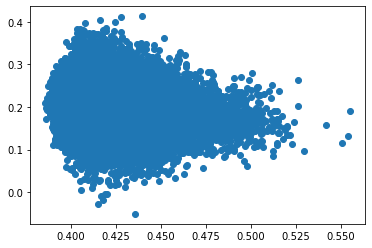

In [73]:
plt.plot(x,y,"o")

In [66]:
r_log

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2015-01-06,-0.0151,-0.0376,0.0563,0.0000,0.0505
2015-01-07,-0.0192,-0.0091,-0.0201,0.0000,-0.0183
2015-01-08,-0.0342,-0.0460,0.0141,0.0000,0.0203
2015-01-09,0.0080,-0.0104,-0.0223,0.0000,-0.0113
2015-01-12,-0.0208,-0.0248,-0.0212,0.0000,0.0207
...,...,...,...,...,...
2015-12-25,0.0057,0.0000,0.0058,-0.0043,-0.0057
2015-12-28,-0.0353,0.0000,-0.0348,-0.0337,-0.0187
2015-12-29,0.0091,0.0000,0.0135,0.0143,0.0398


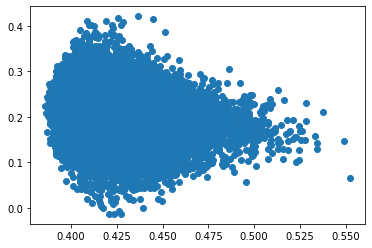

In [71]:
plt.plot(fx,sy,"o")

## 基于scipy.optimizet 的组合投资优化方法

In [74]:
def min_sharpe(weights):
    
    weights = weights/np.sum(weights)
    z_r=np.sum(np.dot(r_log,weights))
    z_f=np.sqrt(np.dot(weights.T, np.dot(r_log.cov()*252, weights)))

    return z_f/z_r#optimize是去最小值，所以这里用夏普率的倒数

In [58]:
min_sharpe(weights)

2.233350945279795

In [76]:
import scipy.optimize as sco

In [148]:
#help(sco)

In [77]:
noa=5
#约束是所有参数(权重)的总和为1。这可以用minimize函数的约定表达如下

cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})

#我们还将参数值(权重)限制在0和1之间。这些值以多个元组组成的一个元组形式提供给最小化函数

bnds = tuple((0,1) for x in range(noa))

#优化函数调用中忽略的唯一输入是起始参数列表(对权重的初始猜测)。我们简单的使用平均分布。

opts = sco.minimize(min_sharpe, noa*[1./noa,], method = 'SLSQP', bounds = bnds, constraints = cons)

opts

     fun: 0.8939093390318993
     jac: array([ 7.92866424e-01,  5.91501594e-05,  4.12997700e-01,  3.19267094e-01,
       -3.01726162e-04])
 message: 'Optimization terminated successfully'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.00000000e+00, 8.36158649e-01, 9.91098657e-17, 0.00000000e+00,
       1.63841351e-01])

In [79]:
opts["x"]

array([0.00000000e+00, 8.36158649e-01, 9.91098657e-17, 0.00000000e+00,
       1.63841351e-01])

In [80]:
sum(np.dot(r_log,opts["x"]))

0.48934441740385565

In [93]:
sum(np.dot(r_log,opts["x"]))

0.48946330119032233

In [61]:
opts['x'].round(3)

array([0.   , 0.   , 0.164, 0.   , 0.836])

In [133]:
#r_log

In [62]:
np.sum(np.dot(r_log,opts['x'].round(3)))

0.48936542038912945

In [79]:
np.sum(np.dot(r_log,opts['x'].round(3)))

0.48930805654399134

## classwork 4

上面是看夏普率最大
参考：https://zhuanlan.zhihu.com/p/20604930?refer=quantstory
找出投资收益率最大的组合权重

In [81]:
def min_sharpe(weights):
    
    weights = weights/np.sum(weights)
    z_r=np.sum(np.dot(r_log,weights))
    return 1/z_r#optimize是去最小值，所以这里用夏普率的倒数

In [82]:
noa=5
#约束是所有参数(权重)的总和为1。这可以用minimize函数的约定表达如下

cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})

#我们还将参数值(权重)限制在0和1之间。这些值以多个元组组成的一个元组形式提供给最小化函数

bnds = tuple((0,1) for x in range(noa))

#优化函数调用中忽略的唯一输入是起始参数列表(对权重的初始猜测)。我们简单的使用平均分布。

opts = sco.minimize(min_sharpe, noa*[1./noa,], method = 'SLSQP', bounds = bnds, constraints = cons)

opts

     fun: 1.8979102858143193
     jac: array([ 2.2531343 , -0.        ,  1.28129637,  1.60179289,  0.82555868])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([4.71844785e-15, 1.00000000e+00, 2.44249065e-15, 6.43929354e-15,
       3.74700271e-15])

In [85]:
opts["x"]

array([4.71844785e-15, 1.00000000e+00, 2.44249065e-15, 6.43929354e-15,
       3.74700271e-15])

In [86]:
np.sum(np.dot(r_log,opts["x"]))

0.5268952950381103